In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition, manifold

# KPCA 是核化PCA

In [2]:
# 使用sklearn自带的鸢尾花分类数据
def load_data():
    iris = datasets.load_iris()
    return iris.data,iris.target

In [5]:
def test_KPCA(*data):
    x,y = data
    kernels = ['linear','poly','rbf','sigmoid']
    for kernel in kernels:
        kpca = decomposition.KernelPCA(kernel=kernel)
        kpca.fit(x)
        # 显示核化矩阵的特征值λ
        print('kernel :{0}, lambdas:{1}'.format(kernel, kpca.lambdas_))


In [14]:
# 不同核的不同图像
def plot_KPCA(*data):
    x,y = data
    kernels = ['linear','poly','rbf','sigmoid']
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    for i,kernel in enumerate(kernels):
        kpca = decomposition.KernelPCA(n_components=2,kernel=kernel)
        kpca.fit(x)
        x_r = kpca.transform(x)
        ax = fig.add_subplot(2,2,i+1)
        for label,color in zip(np.unique(y),colors):
            position =y==label
            ax.scatter(x_r[position,0],x_r[position,1],label='target={0}'.format(label),color=color)
    
        ax.set_xlabel('X[0]')
        ax.set_ylabel('Y[1]')
        ax.legend(loc='best')
        ax.set_title('Kernel ={0}'.format(kernel))
    plt.suptitle('KPCA')   
    plt.show()

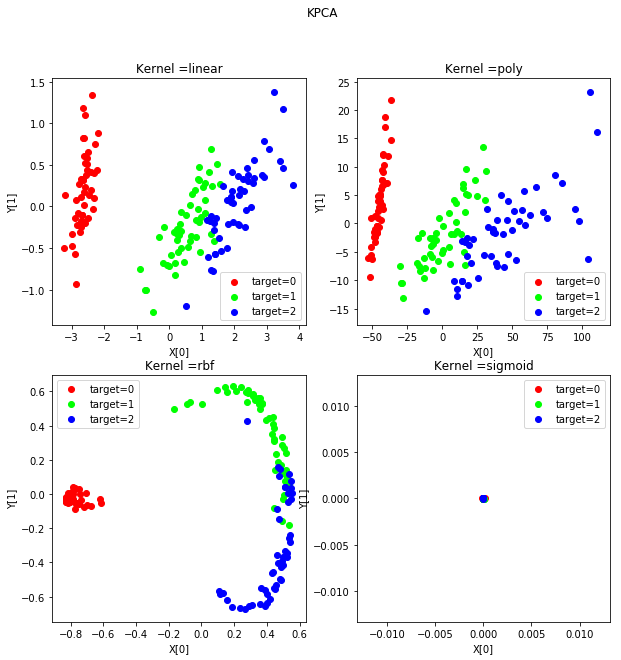

In [16]:
# 测试
x,y = load_data()
plot_KPCA(x,y)

In [21]:
# 多项式核poly 参数的影响
def plot_KPCA_poly(*data):
    x,y = data
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    params = ((3,1,1),(3,10,1),(3,1,10),(3,10,10),(10,1,1),(10,10,1),(10,1,10),(10,10,10))
    
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    
    for i,(p,gamma,r) in enumerate(params):
        kpca = decomposition.KernelPCA(n_components=2,kernel='poly',gamma=gamma,degree=p,coef0=r)
        kpca.fit(x)
        x_r = kpca.transform(x)
        ax = fig.add_subplot(2,4,i+1)
        for label,color in zip(np.unique(y),colors):
            position =y==label
            ax.scatter(x_r[position,0],x_r[position,1],label='target={0}'.format(label),color=color)
    
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.legend(loc='best')
        ax.set_title(r'$(%s (x \cdot z+1)+%s)^{%s}$'%(gamma,r,p))
    plt.suptitle('KPCA-poly')   
    plt.show()

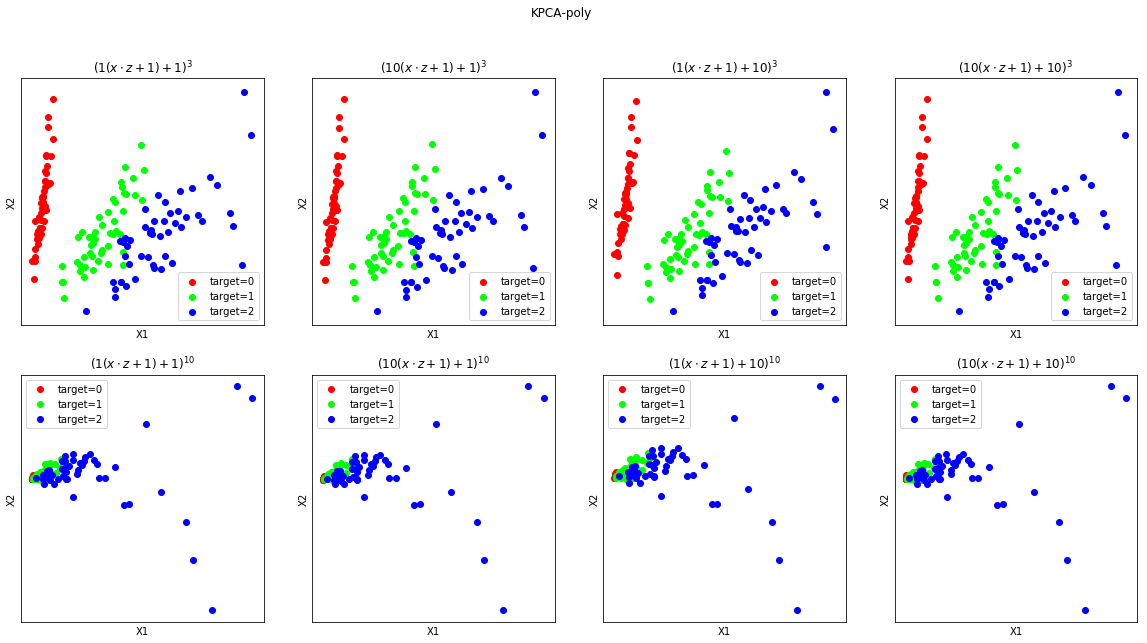

In [22]:
# 测试
x,y = load_data()
plot_KPCA_poly(x,y)

In [25]:
# 高斯核rdf 参数的影响
def plot_KPCA_rdf(*data):
    x,y = data
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    gammas = (0.5,1,4,10)
    
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    
    for i,gamma in enumerate(gammas):
        kpca = decomposition.KernelPCA(n_components=2,kernel='rbf',gamma=gamma)
        kpca.fit(x)
        x_r = kpca.transform(x)
        ax = fig.add_subplot(2,2,i+1)
        for label,color in zip(np.unique(y),colors):
            position =y==label
            ax.scatter(x_r[position,0],x_r[position,1],label='target={0}'.format(label),color=color)
    
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.legend(loc='best')
        ax.set_title(r'$\exp(-%s||x-z||^2)$'%gamma)
    plt.suptitle('KPCA-rbf')   
    plt.show()

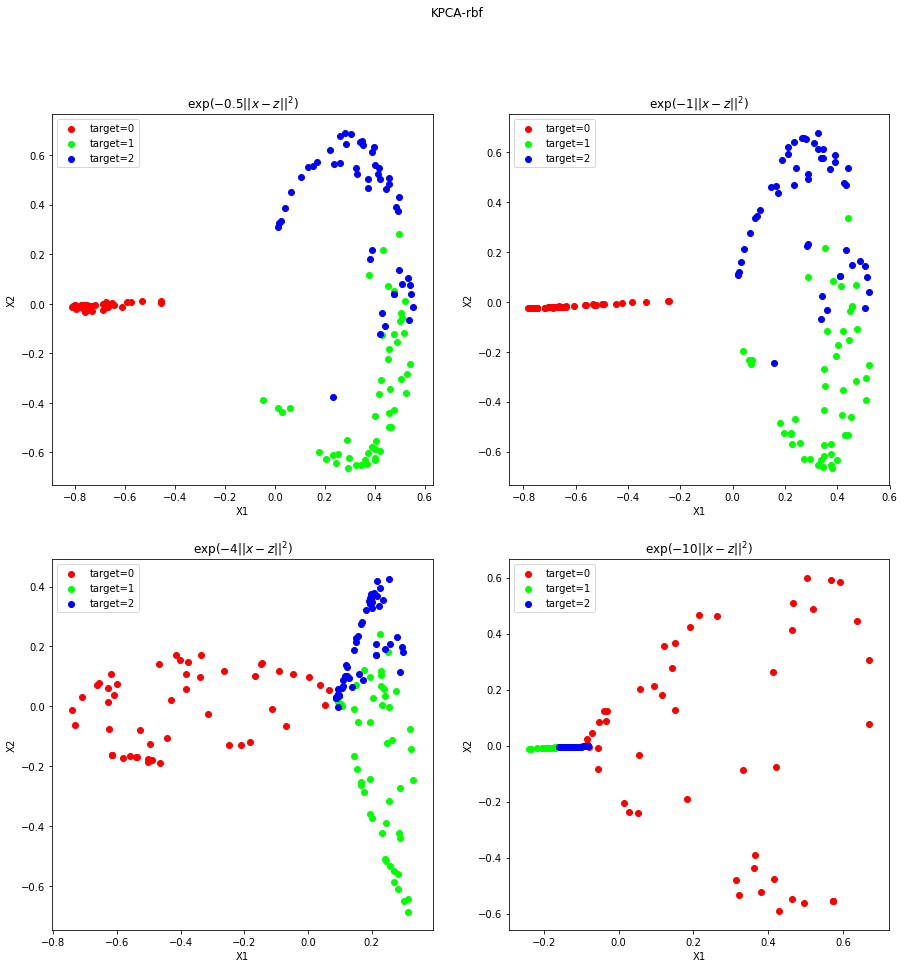

In [26]:
# 测试
x,y = load_data()
plot_KPCA_rdf(x,y)

In [27]:
# 跃迁核SIGMOD 参数的影响
def plot_KPCA_sigmoid(*data):
    x,y = data
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    params = ((0.01,0.1),(0.01,0.2),(0.1,0.1),(0.1,0.2),(0.2,0.1),(0.2,0.2))
    
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    
    for i,(gamma,r) in enumerate(params):
        kpca = decomposition.KernelPCA(n_components=2,kernel='sigmoid',gamma=gamma,coef0=r)
        kpca.fit(x)
        x_r = kpca.transform(x)
        ax = fig.add_subplot(2,3,i+1)
        for label,color in zip(np.unique(y),colors):
            position =y==label
            ax.scatter(x_r[position,0],x_r[position,1],label='target={0}'.format(label),color=color)
    
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.legend(loc='best')
        ax.set_title(r'$(\tanh(%s(x\cdot z)+%s)$'%(gamma,r))
    plt.suptitle('KPCA-sigmoid')   
    plt.show()

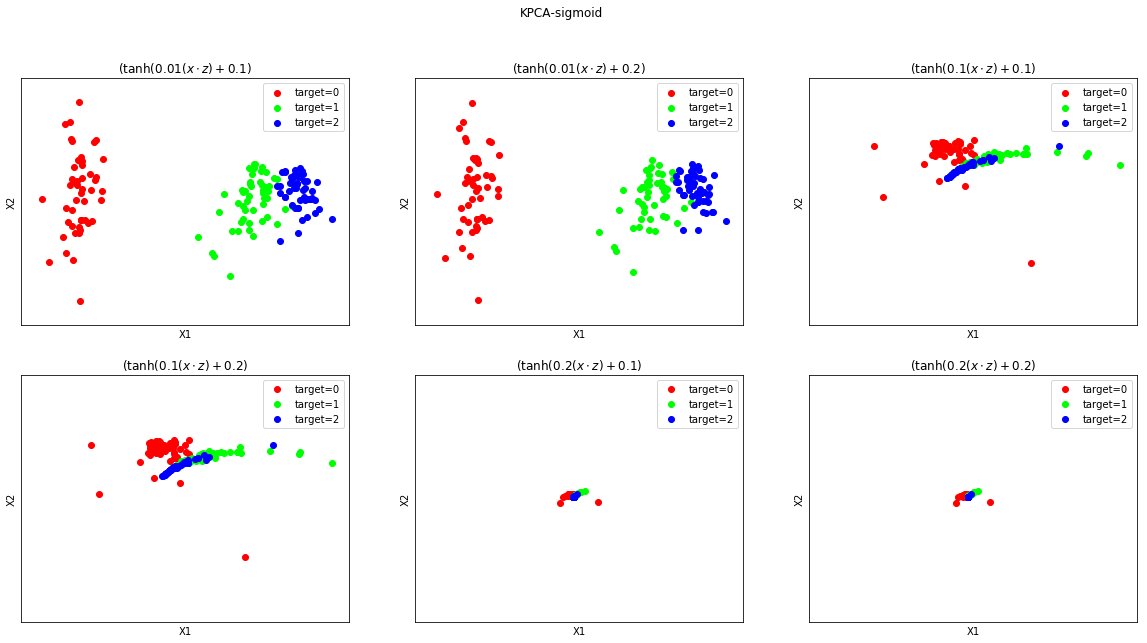

In [28]:
# 测试
x,y = load_data()
plot_KPCA_sigmoid(x,y)